# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_data = pd.merge( mouse_metadata, study_results, on="Mouse ID", how="right")
# Display the data table for preview
pyma_df = pyma_data[["Mouse ID", "Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = pyma_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = pyma_df.loc[pyma_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = pyma_df.loc[pyma_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = pyma_df[pyma_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_volume = pyma_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume =pyma_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_volume =pyma_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_deviation = pyma_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_volume =pyma_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
grouped_pyma_data = pd.DataFrame({
    "Mean Tumor Volume":mean_volume,
    "Median Tumor Volume":median_volume,
    "Tumor Volume Variance": variance_volume,
    "Tumor Volume Std. Dev": standard_deviation,
    "Tumor Volume Std. Err.": sem_volume
})
grouped_pyma_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_data = pyma_df.groupby("Drug Regimen").agg(
           mean =("Tumor Volume (mm3)","mean"),
           median=("Tumor Volume (mm3)","median"),
           variance=("Tumor Volume (mm3)","var"),
           std=("Tumor Volume (mm3)","std"),
           sem=("Tumor Volume (mm3)","sem"),
            )
agg_data

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs =["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
x_axis= np.arange(len(drugs))

<IPython.core.display.Javascript object>


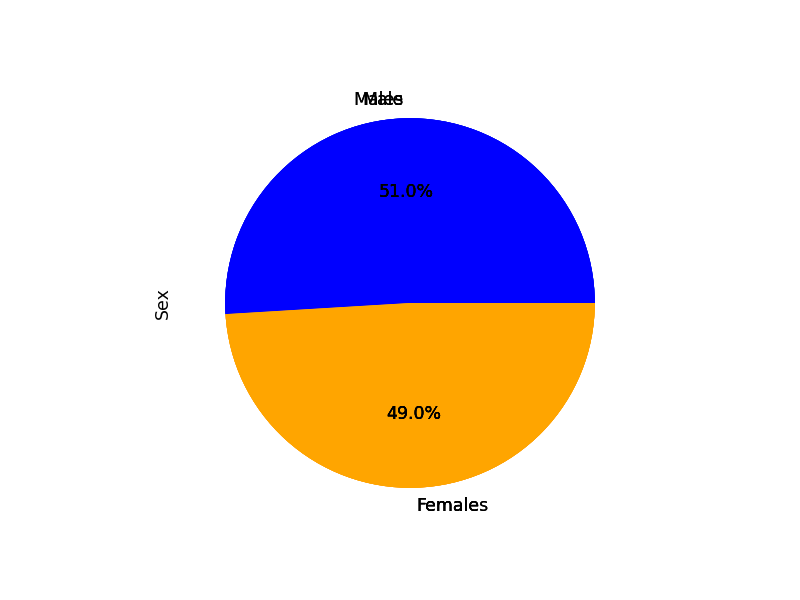

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_mouse_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Males","Females"]
colors=["blue","orange"]
gender= clean_mouse_data["Sex"].value_counts() 
plt.pie(gender, labels=labels, colors=colors,
        autopct="%1.1f%%",startangle=360)
plt.show()


In [ ]:
## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_data.groupby(["Drug Regimen"]).max()["Tumor Volume (mm3)"]
greatest_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Plotting = [ ]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Drug in Drug_Regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
     volume = clean_mouse_data.loc[clean_mouse_data[“Drug Regimen”] == Drug, “Tumor Volume (mm3)“].to_frame()
         Plotting.append(volume[“Tumor Volume (mm3)“].to_list())
#     # Determine outliers using upper and lower bounds

   


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
 # Then to create box plot simply use:# Formatting FlierProps

# flierprops = dict(marker=‘o’, markerfacecolor=‘r’, markersize=12,
#                   linestyle=‘none’)ax1.boxplot(Plotting, flierprops = flierprops)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_point = pyma_df.loc[pyma_df["Drug Regimen"]== "Capomulin",["Timepoint"]]
tumor_volume = pyma_df.loc[pyma_df["Drug Regimen"]== "Capomulin",["Tumor Volume (mm3)"]]


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_tumor= pyma_df.loc[pyma_df["Drug Regimen"]== "Capomulin"]
mouse_weight= Capomulin_tumor["Weight (g)"]
volume=  Capomulin_tumor["Tumor Volume(mm3)"]
plt.scatter(mouse_weight,volume, marker="o", color="blue")
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

